In [1]:
# Imported all of the modules I would need to utilize.  I commented out Plotly, since it is not available in my base environment, which is what I always use except for when creating Plotly visualizations.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import plotly
# import plotly.express as px
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters Pandas will display in a column:
pd.options.display.max_colwidth = 400

## **Data Cleaning**

In [2]:
# Created a DataFrame from the .csv file I saved with Subreddit A's pulled posts.
subreddit_a_part_one = pd.read_csv('./data/subreddit_a.csv')

In [3]:
# Created a DataFrame from the .csv file I saved with Subreddit B's pulled posts.
subreddit_b_part_one = pd.read_csv('./data/subreddit_b.csv')

In [4]:
# Concatenated both of the above DataFrames and saved the resulting DataFrame as "reddit"
reddit = pd.concat([subreddit_a_part_one, subreddit_b_part_one])

In [5]:
# Looked at the shape of the concatenated DataFrame.
reddit.shape

(13567, 73)

In [6]:
# Reset the index of this concatenated DataFrame and saved the results inplace.
reddit.reset_index(inplace = True, drop = True)

In [7]:
# Confirmed that the shape of the DataFrame had not changed.
reddit.shape

(13567, 73)

In [8]:
# Created a new DataFrame named "subreddits" which contained only two of the 73 columns in the concatenated reddit DataFrame.  These two columns would serve as my feature and my label.
subreddits = reddit[['title', 'subreddit']]

In [9]:
# Verified that "subreddits" data type was a DataFrame.
type(subreddits)

pandas.core.frame.DataFrame

In [10]:
# Counted the number of missing values in either of the DataFrame's two columns and realized there were none.
subreddits.isna().sum()

title        0
subreddit    0
dtype: int64

In [11]:
# Proceeded to save this new DataFrame (with only the feature and target columns) as a .csv file.
subreddits.to_csv('./data/subreddits.csv', index=False)

## **Exploratory Data Analysis**

In [12]:
#In order to perform Exploratory Data Analysis without altering the "subreddits" DataFrame, I created a copy of it and named it "df_subreddits"
df_subreddits = subreddits

In [13]:
# Verified that "df_subreddits" was of type DataFrame.
type(df_subreddits)

pandas.core.frame.DataFrame

In [14]:
# Looked at the value counts of the "subreddit" column.
df_subreddits['subreddit'].value_counts()

DebateVaccines     6832
CovidVaccinated    6735
Name: subreddit, dtype: int64

In [15]:
# Looked at the shape of the "df_subreddits" DataFrame.
df_subreddits.shape

(13567, 2)

In [16]:
# Made use of the .info() method in order to obtain information about the DataFrame and its two columns.
df_subreddits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13567 entries, 0 to 13566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      13567 non-null  object
 1   subreddit  13567 non-null  object
dtypes: object(2)
memory usage: 212.1+ KB


In [17]:
# Looked at the top 10 rows of the newly created "df_subreddits" DataFrame.
df_subreddits.head(10)

,title,subreddit
0,4 months post booster and i have &gt;2500 spike antibodies.,CovidVaccinated
1,"If you got the COVID vaccine(s), but were originally skeptical or against getting it, what changed your mind?",CovidVaccinated
2,Nasty cough after booster (Moderna) / experience with side effects ?,CovidVaccinated
3,Getting another booster after experiencing myo/pericarditis.,CovidVaccinated
4,why do so many people say not to get jj?,CovidVaccinated
5,"what to do other than stay hydrated after getting the shot while your body is making antibodies, doing it’s thing or whatever?.. any vitamins, etc. should take? what else?",CovidVaccinated
6,"to the younger individuals here (late teens, early 20’s).. what vaccination did you get and what were your side effects?",CovidVaccinated
7,When should a 12 year old get a booster shot?,CovidVaccinated
8,which vaxx should i get?,CovidVaccinated
9,Vaccinated couple doesn’t allow unvaccinated maternal grandmother to see newborn!! What would you do?,CovidVaccinated


In [18]:
# Looked at the last 10 rows of the newly created "df_subreddits" DataFrame.
df_subreddits.tail(10)

,title,subreddit
13557,How to Recognize Logical Fallacies Commonly Encountered In the Vaccine Debate,DebateVaccines
13558,"Correlation Does Not Equal Causation, Yet Neither Does Correlation Preclude Causation.",DebateVaccines
13559,"Avoid links by u/EnoughNoLibsSpam. She never cites sources, fires fallacies at 500 rounds per minute, and thinks a screenshot of a single line of a study is sufficient evidence.",DebateVaccines
13560,"The death-bed confession of Louis Pasteur, ""Bernard was right; i was wrong. the pathogen is nothing; the terrain is everything.""",DebateVaccines
13561,"The so-called ""booster shot"" is proof that vaccines usually do not work on the first try, and even if they do work sometimes, their effect is short lived and probably not worth the risk over the long term. Do you plan on getting ""booster"" shots the rest of your life? i know i don't",DebateVaccines
13562,"Thought terminating cliché - Please familiarize yourself with these, and call people out when you see them using these, and reference this posting in your reply to them",DebateVaccines
13563,/r/confession - I use pseudo profiles on Facebook to out anti-vax parents to their friends and family,DebateVaccines
13564,/r/confessions - I use pseudo profiles on Facebook to out anti-vax parents to their friends and family,DebateVaccines
13565,"How To Out A Vaccine Shill. Start talking about serious side effects of vaccines, to hook them into a vaccine debate...",DebateVaccines
13566,"Vaccine Shill Formula: ""Not everyone can benefit from taking vaccines, therefore everyone else must take vaccines""",DebateVaccines


In [19]:
# Created a new column named 'title_char_length' which contained the character length of each title.
df_subreddits['title_char_length'] = df_subreddits['title'].apply(len)

/var/folders/xq/q86jqrbx6877l6458n2ldnkr0000gn/T/ipykernel_5259/1305164430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subreddits['title_char_length'] = df_subreddits['title'].apply(len)


In [20]:
# Looked at the top 5 rows of the df_subreddits DataFrame to confirm the presence of the newly created column.
df_subreddits.head()

,title,subreddit,title_char_length
0,4 months post booster and i have &gt;2500 spike antibodies.,CovidVaccinated,59
1,"If you got the COVID vaccine(s), but were originally skeptical or against getting it, what changed your mind?",CovidVaccinated,109
2,Nasty cough after booster (Moderna) / experience with side effects ?,CovidVaccinated,68
3,Getting another booster after experiencing myo/pericarditis.,CovidVaccinated,60
4,why do so many people say not to get jj?,CovidVaccinated,40


In [21]:
# Obtained white space counter function from: https://www.geeksforgeeks.org/python-program-to-count-the-number-of-spaces-in-string/
# Created a function named "check_space" that counted the number of spaces in each title and added 1 to obtain the total number of words.
def check_space(Test_string):
    return Test_string.count(" ") + 1

In [22]:
# Created a new column named 'title_word_count' which contained each title's word count.
df_subreddits['title_word_count'] = df_subreddits['title'].apply(check_space)

/var/folders/xq/q86jqrbx6877l6458n2ldnkr0000gn/T/ipykernel_5259/1987584136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subreddits['title_word_count'] = df_subreddits['title'].apply(check_space)


In [23]:
# Looked at the top 10 rows of the df_subreddits DataFrame to confirm the presence of the newly created column.
df_subreddits.head()

,title,subreddit,title_char_length,title_word_count
0,4 months post booster and i have &gt;2500 spike antibodies.,CovidVaccinated,59,10
1,"If you got the COVID vaccine(s), but were originally skeptical or against getting it, what changed your mind?",CovidVaccinated,109,18
2,Nasty cough after booster (Moderna) / experience with side effects ?,CovidVaccinated,68,11
3,Getting another booster after experiencing myo/pericarditis.,CovidVaccinated,60,6
4,why do so many people say not to get jj?,CovidVaccinated,40,10


In [24]:
# Obtained the longest titles by word count.
df_subreddits.sort_values(by = 'title_word_count', ascending=False).head(10)

,title,subreddit,title_char_length,title_word_count
437,"19 male I had real slight chest pain mainly on my left of my chest , I had my 2 shot on the 7th and went in the ER on the 10th I got 3 test done and they said everything looked perfect, it’s been a week and two days after my second does .. I’m still anxious even tho the pain is gone",CovidVaccinated,283,64
58,"I am wanting to get my booster but I’m scared I’ll experience month long period like I did when I got the J&amp;J vaccine. I don’t want to be on my period while on a cruise. I have been waiting for a 3 day weekend so I can rest and not have to worry about work, but my cruise is in 22 days 😭",CovidVaccinated,291,64
356,I turn 18 March 21st. I have a concert to go to the 17th. I just got invited to it. I need to be completely vaccinated for at least two weeks to enter. Which leaves me with the Johnson and Johnson one. But I hear you have to be 18 for that one. Can I get it? Or are they strict on that?,CovidVaccinated,286,63
442,"So.. let me say this first before I ask my question. If you want to get vaxxed or not, I don’t really care. I feel like it’s a choice.. my 5 YO daughter just went for hers and refused. She was fine the first time but will not go for the second. I know people who have been holding their kids down.",CovidVaccinated,297,62
6054,What happens if you miss the 8 month Booster shot? I'd have to get it this month but still waiting to see if the pros outweigh the cons or if it is really needed. Don't want to end up have to get a whole 2 round Moderna shots if I miss the window but not ready to get the booster yet.,CovidVaccinated,284,61
1264,"Last night my bf(24) and I (19 were cuddling in my living room we had been drinking but he didn’t drink that much, fast forward a few hours I’m pretty drunk and not fully conciois &amp;trying to sleep, I wake up when I see my bf trying to pull down my leggings, I pushed away and pulled them back up and",CovidVaccinated,303,61
430,I’m at the er again I’ve had real slight stinging on both sides of my chest mainly on my left !!!! There is a lot of mfs telling me I won’t be fine but everytime I’m here and get tested with three different test everything comes back perfect I really don’t know what to believe and it’s fucking me up,CovidVaccinated,300,60
1676,"Ik this sounds stupid but I’mfully vaccinated with the Pfizer vaccine and my boyfriend told me he had covid 4 days ago, I think I might of gotten it too because I had symptoms of runny nose and congestion, I want to hang out with him though what happens if I do? Can I kiss him or is that bad??",CovidVaccinated,294,60
12033,"Just a heads up for any new ""anti vaxxers"" who are just getting awoken to the situation, if you aren't careful you'll get yourself very worked up, confused an anxious about it, and may waste a lot of energy in the wrong places. Please do not do what I did, which is to waste all my energy and -",DebateVaccines,294,59
1213,Hey new to Reddit and never done this before but I really need advice on this topic. I have sever anxiety with vaccines and get panic attacks every time I get shots. Does anybody have any advice on how I can prevent a panic attack can calm myself when I go in for this shot next week. Thank you.,CovidVaccinated,295,59


In [25]:
# Obtained the longest titles by character length.
df_subreddits.sort_values(by = 'title_char_length', ascending=False).head(10)

,title,subreddit,title_char_length,title_word_count
9478,"Shocking video footage of violent protests against mandates, lockdowns (Guadaloupe, Denmark, Austria, Croatia, Germany): https://www.aljazeera.com/news/2021/11/22/covid-19-rules-fueled-explosive-unrest-in-guadeloupe-macron?utm_campaign=trueAnthem%3A%20Trending%20Content&amp;utm_medium=trueAnthem&amp;utm_sou",DebateVaccines,308,15
1027,"Don’t be a victim Get your registered CDC, Order &amp; Get NHS, mygov, and Medicare vaccines card/certificates or exemption Worldwide ,C0V!D l9 medication ivermectin tabs. Join &amp; share https://t.me/+pYQ1Ic81O8o1OWI0 Telegram @nojabstoday Text; +1 ‪(210) 245-8347‬ WhatsApp- +1 (909) 318-3699 +(61)49919",CovidVaccinated,306,40
4605,"I'd love to be able to provide my friend with solid, reasonable facts &amp; points abt the vaccine to give her a different perspective so she can weigh her options &amp; decide what to do in an open minded way. I'm hoping that all the lovely well informed ppl could list credible sources &amp; good points.",CovidVaccinated,306,56
10565,"When Vax Advocates post ""Irony Porn"" of famous people who didn't want to get the jab now sick with Covid, I wonder if they detect even the slightest bit of irony in the ever-increasing Vaxxed Breakthrough Hospitalizations &amp; Deaths among people that tried to Shame, Coerce and Mandate the Spike Juice?",DebateVaccines,304,51
337,"3 days after Moderna booster has anyone else experienced swollen lymph nodes in the neck. The same side where my nodes are swollen I’m experiencing sore gums, cheek and a tightness in my neck. I haven’t changed anything in my diet or done anything to cause &amp; come to the conclusion it is the booster",CovidVaccinated,303,55
1264,"Last night my bf(24) and I (19 were cuddling in my living room we had been drinking but he didn’t drink that much, fast forward a few hours I’m pretty drunk and not fully conciois &amp;trying to sleep, I wake up when I see my bf trying to pull down my leggings, I pushed away and pulled them back up and",CovidVaccinated,303,61
10838,"OK, If you absolutely Must Vax, which one is safest w least side effects - Pfizer, Moderna, J&amp;J? (I believe these are the only choices in US until Novavax approval) J&amp;J - one &amp; done but clotting issues. Moderna more effective against D but more S.E. Pfizer less effective but safer. Discuss!",DebateVaccines,303,52
1148,"Don’t be a victim Get your registered CDC, NHS, mygov, and Medicare vaccines card/certificates or exemption Worldwide ,C0V!D l9 medication ivermectin tabs. Join &amp; share https://t.me/+pYQ1Ic81O8o1OWI0 Telegram @DrLydialane WhatsApp- +1 (909) 318-3699 +(61)499191682 +44 7888 889166 for verification",CovidVaccinated,301,38
1763,"Freaking out, I’m fully vaccinated w/ the pfizer vaccine &amp; am home from college visiting my family, my boyfriend just told me he tested positive for covid-19, he’s not vaccinated. I have been hanging out with him for 3 days, &amp; kissing him, could I still get covid from him what are my chances,",CovidVaccinated,301,54
430,I’m at the er again I’ve had real slight stinging on both sides of my chest mainly on my left !!!! There is a lot of mfs telling me I won’t be fine but everytime I’m here and get tested with three different test everything comes back perfect I really don’t know what to believe and it’s fucking me up,CovidVaccinated,300,60


In [26]:
# Obtained the shortest titles by word count.
df_subreddits.sort_values(by = 'title_word_count', ascending=True).head(10)

,title,subreddit,title_char_length,title_word_count
12853,Question,DebateVaccines,8,1
5647,Vaccine,CovidVaccinated,7,1
1798,Undecided,CovidVaccinated,9,1
9469,https://www.cheknews.ca/bccdc-has-stopped-notifying-the-public-about-covid-19-exposures-on-flights-915051/,DebateVaccines,106,1
5599,Help!!,CovidVaccinated,6,1
1826,Workplace,CovidVaccinated,9,1
13119,Vaccines,DebateVaccines,8,1
9513,Thoughts?,DebateVaccines,9,1
1857,Symptoms,CovidVaccinated,8,1
333,Numbness/tingling,CovidVaccinated,17,1


In [27]:
# Obtained the shortest titles by character length. 
df_subreddits.sort_values(by = 'title_char_length', ascending=True).head(10)

,title,subreddit,title_char_length,title_word_count
6344,.,CovidVaccinated,1,1
12591,T,DebateVaccines,1,1
9107,A,DebateVaccines,1,1
12207,s,DebateVaccines,1,1
13458,.,DebateVaccines,1,1
9586,Hi,DebateVaccines,2,1
3536,Hi,CovidVaccinated,2,1
658,??,CovidVaccinated,2,1
8378,MMR,DebateVaccines,3,1
12839,hoi,DebateVaccines,3,1


In [29]:
# Created a Plotly plot of the 'title_char_length' distribution.
# title_char_legnth_hist = px.histogram(data_frame=df_subreddits, x='title_char_length', nbins=25, title='Title Character Length')

In [30]:
# Enlarged the Plotly plot created in the cell above.
# title_char_legnth_hist.update_layout(title_font_size=40, title_x=.5)
# title_char_legnth_hist

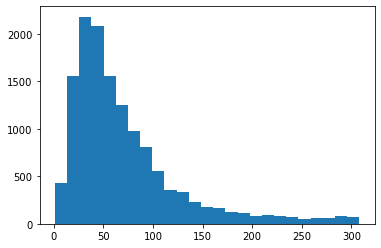

In [31]:
# Created a Matplotlib histogram plot of the 'title_char_length' distribution.
plt.hist(df_subreddits['title_char_length'], bins=25);

In [32]:
# Created a Plotly plot of the 'title_word_length' distribution.
# title_word_legnth_hist = px.histogram(data_frame=df_subreddits, x='title_word_count', nbins=25, title='Title Word Count')

In [33]:
# Enlarged the Plotly plot created in the cell above.
# title_word_legnth_hist.update_layout(title_font_size=40, title_x=.5)
# title_word_legnth_hist

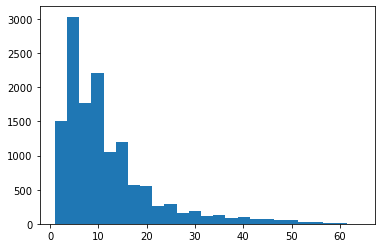

In [35]:
# Created a Matplotlib histogram plot of the 'title_word_length' distribution.
plt.hist(df_subreddits['title_word_count'], bins=25);

In [42]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into unigrams.  Then fit and transformed subreddit A's titles before obtaining the 10 most common unigrams.
cvec_uni = CountVectorizer(ngram_range=(1, 1), stop_words='english')

subreddit_a_uni_titles = cvec_uni.fit_transform(subreddit_a_part_one['title'])

subreddit_a_uni_titles_pd = pd.DataFrame(data=subreddit_a_uni_titles.A, columns=cvec_uni.get_feature_names_out())

subreddit_a_most_common_unigrams = subreddit_a_uni_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_a_most_common_unigrams

booster    1500
pfizer     1486
vaccine    1393
shot        821
covid       785
dose        781
moderna     696
got         511
amp         491
effects     490
dtype: int64

In [43]:
# Fit and transformed the CountVectorizer object above on subreddit B's titles before obtaining the 10 most common unigrams in that corpus.
subreddit_b_uni_titles = cvec_uni.fit_transform(subreddit_b_part_one['title'])

subreddit_b_uni_titles_pd = pd.DataFrame(data=subreddit_b_uni_titles.A, columns=cvec_uni.get_feature_names_out())

subreddit_b_most_common_unigrams = subreddit_b_uni_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_b_most_common_unigrams

vaccine        1727
covid          1407
vaccines       1092
people          546
19              487
vaccinated      453
anti            357
vaxxers         340
pfizer          316
vaccination     300
dtype: int64

In [44]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into bigrams.  Then fit and transformed subreddit A's titles before obtaining the 10 most common bigrams.
cvec_bi = CountVectorizer(ngram_range=(2, 2), stop_words='english')

subreddit_a_bi_titles = cvec_bi.fit_transform(subreddit_a_part_one['title'])

subreddit_a_bi_titles_pd = pd.DataFrame(data=subreddit_a_bi_titles.A, columns=cvec_bi.get_feature_names_out())

subreddit_a_most_common_bigrams = subreddit_a_bi_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_a_most_common_bigrams

pfizer booster     297
moderna booster    263
booster shot       189
covid vaccine      168
second dose        165
pfizer vaccine     165
2nd dose           137
dose pfizer        130
pfizer shot        127
pfizer dose         93
dtype: int64

In [46]:
# Fit and transformed the CountVectorizer object above on subreddit B's titles before obtaining the 10 most common bigrams in that corpus.
subreddit_b_bi_titles = cvec_bi.fit_transform(subreddit_b_part_one['title'])

subreddit_b_bi_titles_pd = pd.DataFrame(data=subreddit_b_bi_titles.A, columns=cvec_bi.get_feature_names_out())

subreddit_b_most_common_bigrams = subreddit_b_bi_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_b_most_common_bigrams

covid 19          476
covid vaccine     204
anti vaxxers      157
19 vaccine        144
pro vaxxers       120
covid vaccines    113
19 vaccines        72
vaccines cause     67
spike protein      58
sars cov           58
dtype: int64

In [48]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into trigrams.  Then fit and transformed subreddit A's titles before obtaining the 10 most common trigrams.
cvec_tri = CountVectorizer(ngram_range=(3, 3), stop_words='english')

subreddit_a_tri_titles = cvec_tri.fit_transform(subreddit_a_part_one['title'])

subreddit_a_tri_titles_pd = pd.DataFrame(data=subreddit_a_tri_titles.A, columns=cvec_tri.get_feature_names_out())

subreddit_a_most_common_trigrams = subreddit_a_tri_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_a_most_common_trigrams

second dose pfizer           32
pfizer booster shot          30
second pfizer shot           25
2nd pfizer shot              25
got moderna booster          24
swollen lymph nodes          24
covid 19 vaccine             22
pfizer booster experience    20
2nd pfizer dose              19
2nd dose pfizer              19
dtype: int64

In [49]:
# Fit and transformed the CountVectorizer object above on subreddit B's titles before obtaining the 10 most common trigrams in that corpus.
subreddit_b_tri_titles = cvec_tri.fit_transform(subreddit_b_part_one['title'])

subreddit_b_tri_titles_pd = pd.DataFrame(data=subreddit_b_tri_titles.A, columns=cvec_tri.get_feature_names_out())

subreddit_b_most_common_trigrams = subreddit_b_tri_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_b_most_common_trigrams

covid 19 vaccine           144
covid 19 vaccines           71
question pro vaxxers        40
vaccines cause autism       39
covid 19 vaccination        25
pfizer covid 19             15
vaccines safe effective     14
pro vaxxers believe         13
covid 19 deaths             13
dr robert malone            12
dtype: int64

In [58]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 4 n-grams.  Then fit and transformed subreddit A's titles before obtaining the 10 most common 4 n-grams.
cvec_quad = CountVectorizer(ngram_range=(4, 4), stop_words='english')

subreddit_a_quad_titles = cvec_quad.fit_transform(subreddit_a_part_one['title'])

subreddit_a_quad_titles_pd = pd.DataFrame(data=subreddit_a_quad_titles.A, columns=cvec_quad.get_feature_names_out())

subreddit_a_most_common_quadgrams = subreddit_a_quad_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_a_most_common_quadgrams

just got moderna booster      10
moderna booster flu shot       6
second dose pfizer vaccine     6
just got pfizer booster        5
got second pfizer shot         5
moderna booster half dose      5
just got pfizer shot           4
booster flu shot time          4
swollen lymph nodes neck       4
pfizer booster flu shot        4
dtype: int64

In [51]:
# Fit and transformed the CountVectorizer object above on subreddit B's titles before obtaining the 10 most common 4 n-grams in that corpus.
subreddit_b_quad_titles = cvec_quad.fit_transform(subreddit_b_part_one['title'])

subreddit_b_quad_titles_pd = pd.DataFrame(data=subreddit_b_quad_titles.A, columns=cvec_quad.get_feature_names_out())

subreddit_b_most_common_quadgrams = subreddit_b_quad_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_b_most_common_quadgrams

pfizer covid 19 vaccine           12
athlete cardiac arrests issues    10
question pro vaxxers believe       8
believe vaccines cause autism      7
covid shots european database      6
pro vaxxers believe vaccines       6
following covid shots european     6
pfizer biontech covid 19           5
sars cov delta variant             5
biontech covid 19 vaccine          5
dtype: int64

In [53]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 5 n-grams.  Then fit and transformed subreddit A's titles before obtaining the 10 most common 5 n-grams.
cvec_quint = CountVectorizer(ngram_range=(5, 5), stop_words='english')

subreddit_a_quint_titles = cvec_quint.fit_transform(subreddit_a_part_one['title'])

subreddit_a_quint_titles_pd = pd.DataFrame(data=subreddit_a_quint_titles.A, columns=cvec_quint.get_feature_names_out())

subreddit_a_most_common_quintgrams = subreddit_a_quint_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_a_most_common_quintgrams

just wondering vaccine causes immune           3
september amp ve mild indigestion              3
mild indigestion stomach cramping gassiness    3
got moderna shot 30th september                3
got moderna booster flu shot                   3
chest pain 1st dose pfizer                     3
reaction thing just curious works              3
ve mild indigestion stomach cramping           3
vaccine causes immune reaction thing           3
shot 30th september amp ve                     3
dtype: int64

In [54]:
# Fit and transformed the CountVectorizer object above on subreddit B's titles before obtaining the 10 most common 5 n-grams in that corpus.
subreddit_b_quint_titles = cvec_quint.fit_transform(subreddit_b_part_one['title'])

subreddit_b_quint_titles_pd = pd.DataFrame(data=subreddit_b_quint_titles.A, columns=cvec_quint.get_feature_names_out())

subreddit_b_most_common_quintgrams = subreddit_b_quint_titles_pd.sum().sort_values(ascending=False).head(10)
subreddit_b_most_common_quintgrams

following covid shots european database                   6
pfizer biontech covid 19 vaccine                          5
vaccines retroviruses whistleblower reveals government    4
retroviruses whistleblower reveals government hiding      4
injuries following covid shots european                   4
severe allergies anaphylaxis mrna covid19                 3
variant poised acquire complete resistance                3
complete resistance wild type spike                       3
acquire complete resistance wild type                     3
delta variant poised acquire complete                     3
dtype: int64